In [1]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

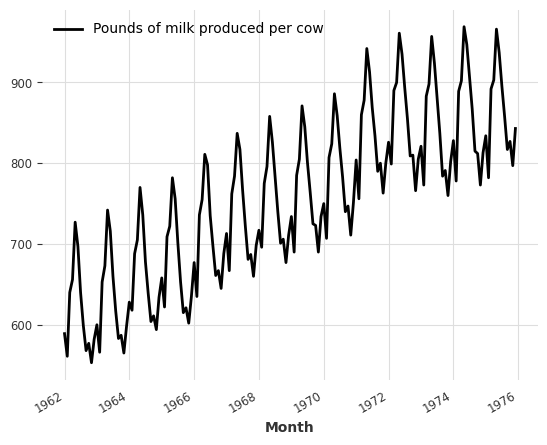

In [2]:
import matplotlib.pyplot as plt
series_milk = MonthlyMilkDataset().load()

series_milk.plot(label='Pounds of milk produced per cow')
plt.legend();

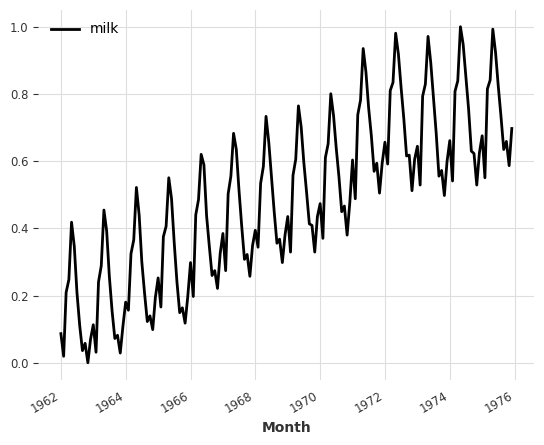

In [3]:
from darts.dataprocessing.transformers import Scaler
scaler_milk = Scaler()
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_milk_scaled.plot(label='milk')
plt.legend();

In [4]:
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [5]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel, StatsForecastAutoARIMA, TBATS, Theta, Prophet, XGBModel, TFTModel
from darts.metrics import mape, smape, mase, mse, r2_score, mae, rmse

In [6]:
def predict(model_air, train_milk, series_milk_scaled):

    pred = model_air.predict(n=36, series=train_milk)

    series_milk_scaled.plot(label='actual')
    pred.plot(label='forecast')
    plt.legend();
    #metrics
    print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))
    print('SMAPE = {:.2f}%'.format(smape(series_milk_scaled, pred)))
    print('MASE = {:.2f}'.format(mase(series_milk_scaled, pred, train_milk)))
    print('MSE = {:.2f}'.format(mse(series_milk_scaled, pred)))
    print('R2 = {:.2f}'.format(r2_score(series_milk_scaled, pred)))
    print('MAE = {:.2f}'.format(mae(series_milk_scaled, pred)))
    print('RMSE = {:.2f}'.format(rmse(series_milk_scaled, pred)))

In [7]:
epochs = 15000

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimat

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=15000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE = 8.06%
SMAPE = 7.64%
MASE = 0.58
MSE = 0.00
R2 = 0.82
MAE = 0.05
RMSE = 0.06


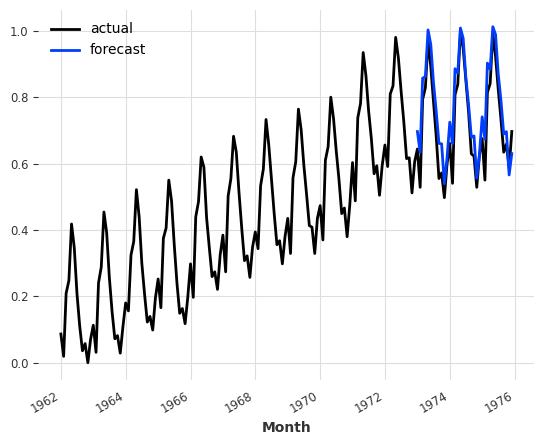

In [8]:
model_air = NBEATSModel(
    input_chunk_length=24, 
    output_chunk_length=12, 
    n_epochs=epochs, 
    random_state=0,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

model_air.fit(train_milk, verbose=True)

predict(model_air, train_milk, series_milk_scaled)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | V             | Linear           | 26    
---------------------------------------------------
726       Trainable params
0         Non-trainable params


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=15000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE = 141.91%
SMAPE = 148.40%
MASE = 11.11
MSE = 1.43
R2 = -67.39
MAE = 1.02
RMSE = 1.19


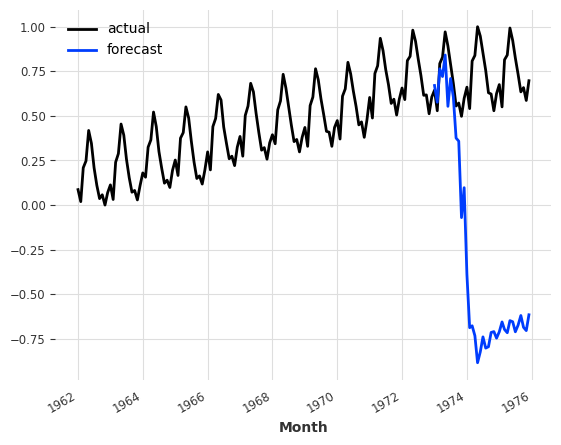

In [9]:
model_air = RNNModel(
    input_chunk_length=24, 
    output_chunk_length=12, 
    n_epochs=epochs, 
    random_state=0,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

model_air.fit(train_milk, verbose=True)

predict(model_air, train_milk, series_milk_scaled)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 152   
----------------------------------------------------
152       Trainable params
0         Non-trainable

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=15000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE = 8.58%
SMAPE = 8.18%
MASE = 0.64
MSE = 0.00
R2 = 0.79
MAE = 0.06
RMSE = 0.07


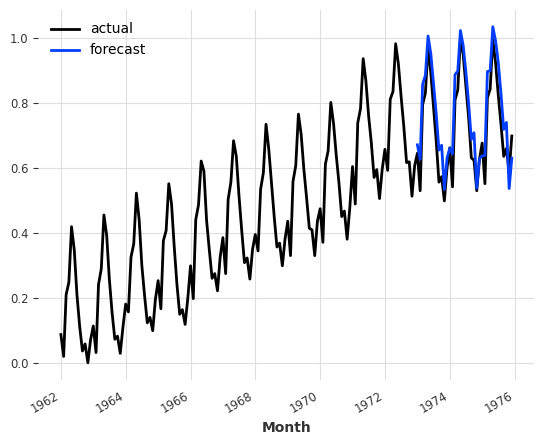

In [10]:
model_air = TCNModel(
    input_chunk_length=24, 
    output_chunk_length=12, 
    n_epochs=epochs, 
    random_state=0,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

model_air.fit(train_milk, verbose=True)

predict(model_air, train_milk, series_milk_scaled)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         |

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=15000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE = 4.60%
SMAPE = 4.51%
MASE = 0.33
MSE = 0.00
R2 = 0.92
MAE = 0.03
RMSE = 0.04


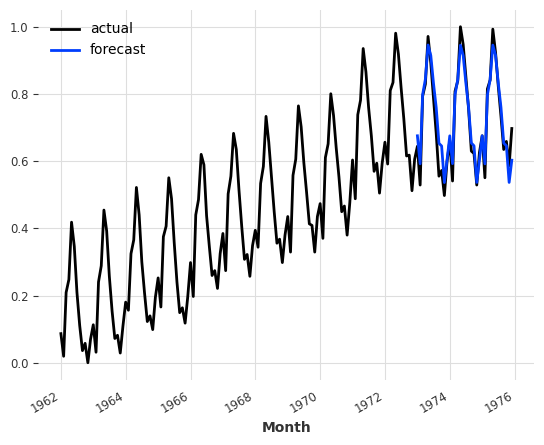

In [11]:
model_air = TransformerModel(
    input_chunk_length=24, 
    output_chunk_length=12, 
    n_epochs=epochs, 
    random_state=0,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

model_air.fit(train_milk, verbose=True)

predict(model_air, train_milk, series_milk_scaled)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | fc            | Sequential       | 312   
---------------------------------------------------
1.0 K     Trainable params
0         Non-trainable params


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=15000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE = 6.41%
SMAPE = 6.57%
MASE = 0.47
MSE = 0.00
R2 = 0.84
MAE = 0.04
RMSE = 0.06


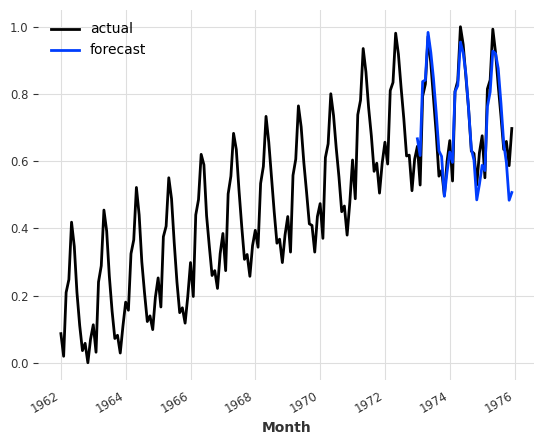

In [12]:
model_air = BlockRNNModel(
    input_chunk_length=24, 
    output_chunk_length=12, 
    n_epochs=epochs, 
    random_state=0,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

model_air.fit(train_milk, verbose=True)

predict(model_air, train_milk, series_milk_scaled)

08:57:49 - cmdstanpy - INFO - Chain [1] start processing
08:57:49 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 23.21%
SMAPE = 20.52%
MASE = 1.74
MSE = 0.03
R2 = -0.35
MAE = 0.16
RMSE = 0.17


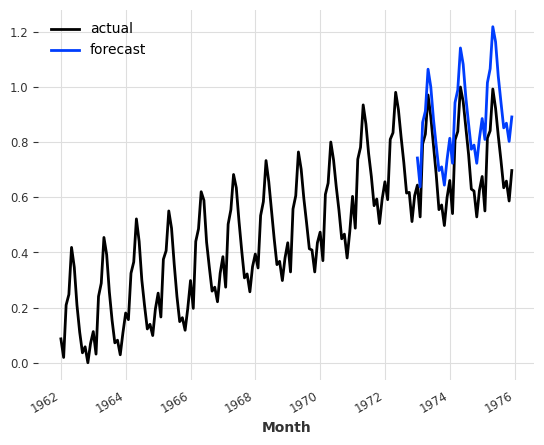

In [13]:
model_air = Prophet(
    add_seasonalities=None,
    country_holidays=None,
    suppress_stdout_stderror=True,
    add_encoders=None,
    )

model_air.fit(train_milk)

pred = model_air.predict(n=36)

series_milk_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();

#metrics
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))
print('SMAPE = {:.2f}%'.format(smape(series_milk_scaled, pred)))
print('MASE = {:.2f}'.format(mase(series_milk_scaled, pred, train_milk)))
print('MSE = {:.2f}'.format(mse(series_milk_scaled, pred)))
print('R2 = {:.2f}'.format(r2_score(series_milk_scaled, pred)))
print('MAE = {:.2f}'.format(mae(series_milk_scaled, pred)))
print('RMSE = {:.2f}'.format(rmse(series_milk_scaled, pred)))

#predict(model_air, train_air, series_air_scaled)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                              | Type                             | Params
----------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0     
1  | val_metrics                       | MetricCollection                 | 0     
2  | input_embeddings                  | _MultiEmbedding                  | 0     
3  | static_covar

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=15000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE = 10.73%
SMAPE = 9.98%
MASE = 0.80
MSE = 0.01
R2 = 0.67
MAE = 0.07
RMSE = 0.08


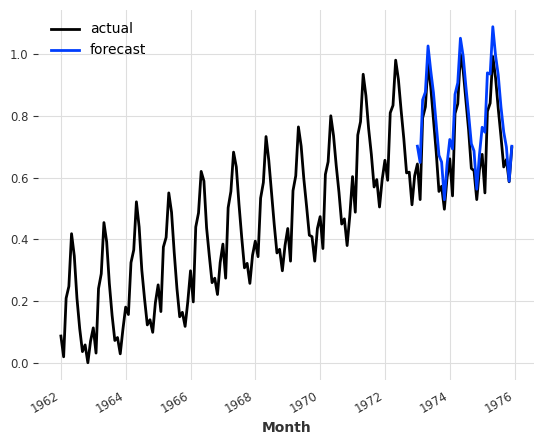

In [14]:
model_air = TFTModel(
    input_chunk_length=24, 
    output_chunk_length=12, 
    n_epochs=epochs, 
    hidden_size=16, 
    lstm_layers=1, 
    num_attention_heads=4, 
    full_attention=False, 
    feed_forward='GatedResidualNetwork', 
    dropout=0.1, 
    hidden_continuous_size=8, 
    categorical_embedding_sizes=None, 
    add_relative_index=False, 
    loss_fn=None, 
    likelihood=None, 
    norm_type='LayerNorm',
    add_encoders={
        'cyclic': {'future': ['month']},
        'datetime_attribute': {'future': ['hour', 'dayofweek']},
        'position': {'past': ['relative'], 'future': ['relative']},
        'custom': {'past': [lambda idx: (idx.year - 1950) / 50]},
        'transformer': Scaler()
    },
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

model_air.fit(train_milk, verbose=True)

predict(model_air, train_milk, series_milk_scaled)